# **Imports and Mount Drive**

In [21]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from google.colab import drive

In [23]:
#!git clone 'https://github.com/zhuyitan/IGTD'

# **Prep IGTD**


In [ ]:
###############################################################################################################################
# Image Generator for Tabular Adata (IGTD)
###############################################################################################################################

# Clone git repository and browse there
#
#!git clone 'https://github.com/zhuyitan/IGTD'

#!cd IGTD/

import Scripts.IGTD_Functions as igtd

def run_igtd(dataset, rows, cols, result_dir):

    # Set parameters

    norm_data = igtd.min_max_transform(dataset.values)
    norm_data = pd.DataFrame(norm_data, columns=dataset.columns, index=dataset.index)

    num_row = rows    # Number of pixel rows in image representation
    num_col = cols    # Number of pixel columns in image representation
    num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
    save_image_size = 10 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
    max_step = 1000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
    val_step = 100  # The number of iterations for determining algorithm convergence. If the error reduction rate is smaller than a pre-set threshold for val_step itertions, the algorithm converges.
    fea_dist_method = 'Euclidean'
    image_dist_method = 'Euclidean'
    error = 'squared'
    switch_t=0 # the threshold to determine whether switch should happen
    min_gain=0.00001 # if the objective function is not improved more than 'min_gain' in 'val_step' steps, the algorithm terminates.

    os.makedirs(name=result_dir, exist_ok=True)

    # Transform

    igtd.table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
                  max_step, val_step, result_dir, error, switch_t, min_gain)

    # Deleting the txts

    # Se for salvar na pasta compartilhada: dataset_dengue_chika/data/
    #dataset_dir = "dataset_dengue_chika/data"
    #dir_name = "/content/gdrive/MyDrive/Mestrado/Results/dataset_dengue_chika/data/"

    return None

# **Congenital Syphilis**


In [ ]:
X_train = pd.read_csv('Tabular data sets/Syphilis/X_train.csv', sep=';')
X_test = pd.read_csv('Tabular data sets/Syphilis/X_test.csv', sep=';')

In [ ]:
X_train[0] = 0
X_train[1] = 0
X_train[2] = 0

X_test[0] = 0
X_test[1] = 0
X_test[2] = 0

In [ ]:
X_train.shape

(1321, 64)

In [ ]:
# Run IGTD on Train set

result_dir = "/IGTD/Datasets/Syphilis/Train"
run_igtd(dataset = X_train, rows = 8, cols = 8, result_dir = result_dir)

In [ ]:
# Run IGTD on Test set

result_dir = "/IGTD/Datasets/Syphilis/Test"
run_igtd(dataset = X_test, rows = 8, cols = 8, result_dir = result_dir)

# **Visualize**

In [24]:
dir = 'Tabular data sets/Syphilis/y_train.csv'
y_train = pd.read_csv(dir, sep=';')

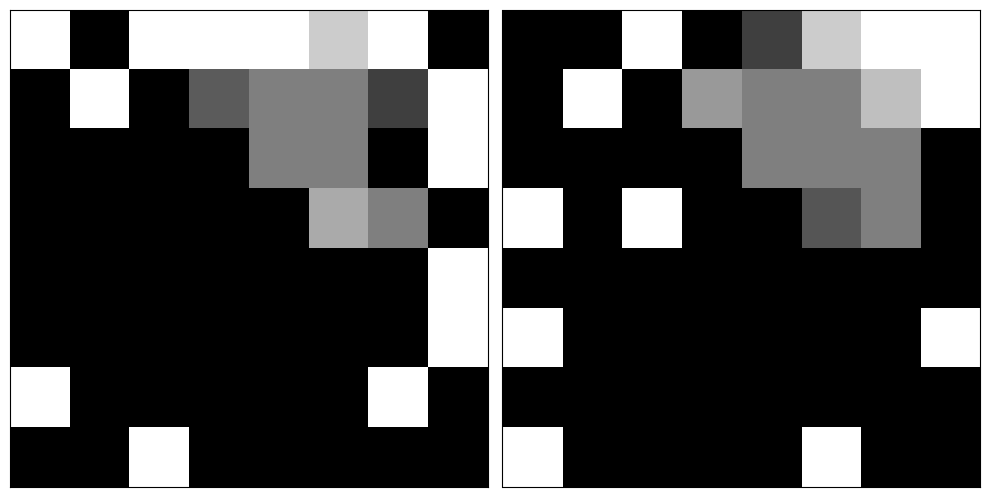

In [26]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
dir = '/IGTD/Datasets/Syphilis/Train/Results.pkl'

data = []

with open(dir, "rb") as file:
  for i in range(0, 3):
    data.append(pickle.load(file))

data = np.moveaxis(data[1], 2, 0)
data = np.expand_dims(X_train, 3)

# Extract the two images you want to plot
image1 = data[0]
image2 = data[1]

# Reshape the images if needed
image1 = np.reshape(image1, (8, 8))  # Replace height and width with the actual dimensions of your image
image2 = np.reshape(image2, (8, 8))  # Replace height and width with the actual dimensions of your image

# Plot the two images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image1, cmap='gray_r')
#ax[0].set_xlabel("Label: {}".format(y_train.iloc[1]))
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(image2, cmap='gray_r')
#ax[1].set_xlabel("Label: {}".format(y_train.iloc[2]))
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()
plt.show()